In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
analysis_df = pd.read_csv("analysis_2020_08/analysis.tsv", delimiter="\t")[["ds_nodes","ds_links","non_as_routers","graph_coreness","core_order","density_lcc","assortativity_lcc","transitivity_lcc","approx_avg_shortest_path_len"]].dropna()
analysis_df

,ds_nodes,ds_links,non_as_routers,graph_coreness,core_order,density_lcc,assortativity_lcc,transitivity_lcc,approx_avg_shortest_path_len
0,1000,1264,42,7.0,10.0,0.002175,-0.789422,0.017278,3.724659
3,1002,16492,4061,14.0,38.0,0.000887,-0.479925,0.022093,3.244771
4,1002,2982,1360,5.0,12.0,0.001085,-0.426800,0.008879,4.488884
5,1003,1362,328,2.0,55.0,0.001553,-0.560850,0.000115,3.048465
9,1006,2131,610,10.0,11.0,0.001522,-0.305545,0.027635,4.050626
...,...,...,...,...,...,...,...,...,...
2113,581362,754669,41890,21.0,28.0,0.000004,-0.508758,0.000784,3.978321
2114,586305,930335,323886,6.0,7.0,0.000002,-0.219191,0.000014,5.125428
2118,674414,1309172,161210,48.0,70.0,0.000004,-0.319592,0.003252,5.216719
2119,737909,975056,184234,20.0,37.0,0.000002,-0.259769,0.000113,3.780878


In [ ]:
axl = pd.plotting.scatter_matrix(analysis_df, alpha=0.2, figsize=(20,20))
# for i, axs in enumerate(axl):
#     for j, ax in enumerate(axs):
#         if i != j:  # only the scatter plots
#             ax.set_xscale('log')
#             ax.set_yscale('log')

In [ ]:
df_star = analysis_df.loc[analysis_df["graph_coreness"] == 1]
pd.plotting.scatter_matrix(df_star, alpha=0.2, figsize=(20,20))

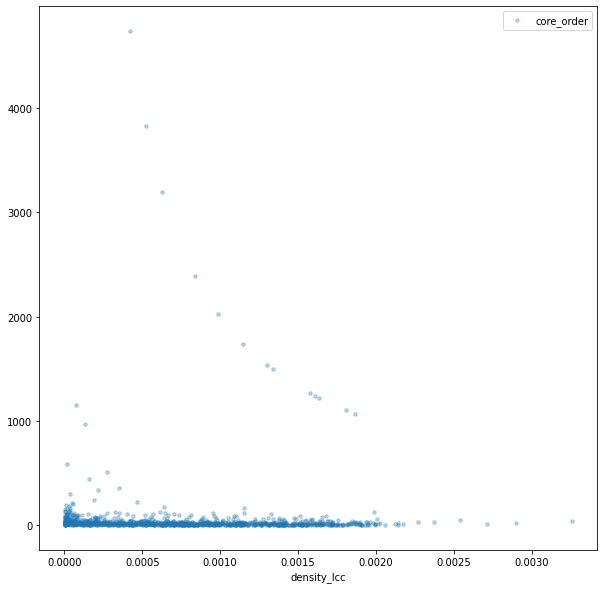

In [7]:
df = analysis_df[["core_order","density_lcc"]]
df.plot(ls="", marker = ".", markersize=7, alpha=.3, figsize=(10,10), x="density_lcc")
plt.savefig("figures/core_vs_density.png", dpi=300)
# plt.yscale("log")
# plt.xscale("log")

<AxesSubplot:xlabel='density_lcc'>

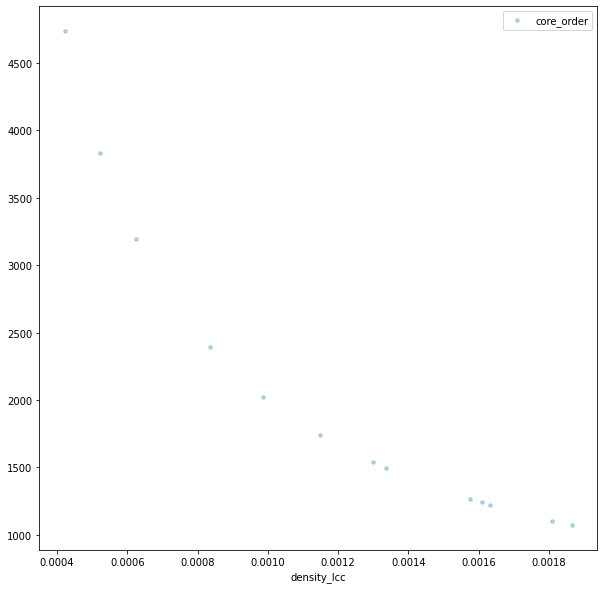

In [4]:
df1 = df.loc[(df["core_order"] > 1000) & (df["density_lcc"] > 0.0004)]
df1.plot(ls="", marker = ".", markersize=7, alpha=.3, figsize=(10,10), x="density_lcc")

In [6]:
df2 = pd.read_csv("analysis_2020_08/analysis.tsv", delimiter="\t")
df2.loc[(df2["core_order"] > 1000) & (df2["density_lcc"] > 0.0004)][["as_number","ds_nodes","ds_links","non_as_routers","leaf1","border","ri_leaf1_aggr","max_leaf1_per_leaf1_aggr","ri_pp_ifs_dis","re_pp_ifs_dis","dis_leaf_aggr_leaf1_num"]]

,as_number,ds_nodes,ds_links,non_as_routers,leaf1,border,ri_leaf1_aggr,max_leaf1_per_leaf1_aggr,ri_pp_ifs_dis,re_pp_ifs_dis,dis_leaf_aggr_leaf1_num
47,18429,1031,2051,1026,3,1028,1.0,3.0,"{""1"": 1029, ""4"": 1, ""1019"": 1}","{""1"": 21, ""2"": 1004, ""17"": 1}","{""3"": 1}"
102,7355,1073,1074,5,1069,4,1.0,1069.0,"{""1"": 1072, ""1071"": 1}","{""1"": 5}","{""1069"": 1}"
136,8273,1099,1112,17,1018,78,5.0,559.0,"{""1"": 1093, ""2"": 3, ""3"": 1, ""466"": 1, ""565"": 1}","{""1"": 12, ""2"": 3, ""10"": 1, ""59"": 1}","{""1"": 2, ""2"": 1, ""455"": 1, ""559"": 1}"
275,56291,1213,2409,1204,5,1208,1.0,5.0,"{""1"": 1211, ""2"": 1, ""1201"": 1}","{""1"": 14, ""2"": 1188, ""3"": 1, ""11"": 1}","{""5"": 1}"
281,208397,1219,1228,14,1187,32,1.0,1187.0,"{""1"": 1216, ""2"": 2, ""1197"": 1}","{""1"": 11, ""5"": 1, ""9"": 1, ""14"": 1}","{""1187"": 1}"
320,41717,1249,1274,39,609,640,1.0,609.0,"{""1"": 1241, ""2"": 5, ""7"": 1, ""13"": 1, ""614"": 1}","{""1"": 36, ""5"": 1, ""8"": 1, ""614"": 1}","{""609"": 1}"
338,13389,1274,1277,8,1260,14,1.0,1260.0,"{""1"": 1273, ""1264"": 1}","{""1"": 4, ""2"": 2, ""3"": 1, ""6"": 1}","{""1260"": 1}"
521,14750,1490,1501,15,1459,24,11.0,1444.0,"{""1"": 1478, ""2"": 7, ""3"": 2, ""5"": 1, ""6"": 1, ""1...","{""1"": 10, ""2"": 4, ""12"": 1}","{""1"": 7, ""2"": 1, ""3"": 2, ""1444"": 1}"
591,48330,1561,1578,42,1497,64,2.0,1495.0,"{""1"": 1555, ""2"": 4, ""3"": 1, ""1513"": 1}","{""1"": 37, ""2"": 2, ""10"": 1, ""12"": 1, ""14"": 1}","{""2"": 1, ""1495"": 1}"
622,57888,1608,3209,1613,10,1596,2.0,9.0,"{""1"": 1602, ""2"": 4, ""4"": 1, ""1607"": 1}","{""1"": 43, ""2"": 1567, ""3"": 1, ""5"": 1, ""10"": 1}","{""1"": 1, ""9"": 1}"


In [ ]:
df2.loc[df2["graph_coreness"] == 1]